In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:01<00:00, 118MB/s] 
100% 163M/163M [00:01<00:00, 115MB/s]


In [ ]:
from zipfile import ZipFile
dataset ='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os


In [ ]:
filenames_with_mask=os.listdir('/content/data/with_mask')
print(filenames_with_mask)

['with_mask_1622.jpg', 'with_mask_3028.jpg', 'with_mask_2923.jpg', 'with_mask_2423.jpg', 'with_mask_1699.jpg', 'with_mask_1993.jpg', 'with_mask_975.jpg', 'with_mask_1451.jpg', 'with_mask_1497.jpg', 'with_mask_512.jpg', 'with_mask_2962.jpg', 'with_mask_3244.jpg', 'with_mask_216.jpg', 'with_mask_564.jpg', 'with_mask_55.jpg', 'with_mask_2153.jpg', 'with_mask_2461.jpg', 'with_mask_1181.jpg', 'with_mask_556.jpg', 'with_mask_1920.jpg', 'with_mask_1708.jpg', 'with_mask_2305.jpg', 'with_mask_2845.jpg', 'with_mask_420.jpg', 'with_mask_1050.jpg', 'with_mask_3645.jpg', 'with_mask_1135.jpg', 'with_mask_3591.jpg', 'with_mask_2842.jpg', 'with_mask_3578.jpg', 'with_mask_2256.jpg', 'with_mask_271.jpg', 'with_mask_2165.jpg', 'with_mask_419.jpg', 'with_mask_3260.jpg', 'with_mask_1027.jpg', 'with_mask_2898.jpg', 'with_mask_3509.jpg', 'with_mask_441.jpg', 'with_mask_2946.jpg', 'with_mask_2357.jpg', 'with_mask_1358.jpg', 'with_mask_525.jpg', 'with_mask_3662.jpg', 'with_mask_658.jpg', 'with_mask_1026.jpg', 

In [ ]:
filenames_without_mask=os.listdir('/content/data/without_mask')
print(filenames_with_mask)

['with_mask_1622.jpg', 'with_mask_3028.jpg', 'with_mask_2923.jpg', 'with_mask_2423.jpg', 'with_mask_1699.jpg', 'with_mask_1993.jpg', 'with_mask_975.jpg', 'with_mask_1451.jpg', 'with_mask_1497.jpg', 'with_mask_512.jpg', 'with_mask_2962.jpg', 'with_mask_3244.jpg', 'with_mask_216.jpg', 'with_mask_564.jpg', 'with_mask_55.jpg', 'with_mask_2153.jpg', 'with_mask_2461.jpg', 'with_mask_1181.jpg', 'with_mask_556.jpg', 'with_mask_1920.jpg', 'with_mask_1708.jpg', 'with_mask_2305.jpg', 'with_mask_2845.jpg', 'with_mask_420.jpg', 'with_mask_1050.jpg', 'with_mask_3645.jpg', 'with_mask_1135.jpg', 'with_mask_3591.jpg', 'with_mask_2842.jpg', 'with_mask_3578.jpg', 'with_mask_2256.jpg', 'with_mask_271.jpg', 'with_mask_2165.jpg', 'with_mask_419.jpg', 'with_mask_3260.jpg', 'with_mask_1027.jpg', 'with_mask_2898.jpg', 'with_mask_3509.jpg', 'with_mask_441.jpg', 'with_mask_2946.jpg', 'with_mask_2357.jpg', 'with_mask_1358.jpg', 'with_mask_525.jpg', 'with_mask_3662.jpg', 'with_mask_658.jpg', 'with_mask_1026.jpg', 

In [ ]:
num_of_with_mask=len(filenames_with_mask)
print("Number of images with mask: ",num_of_with_mask)
num_of_without_mask=len(filenames_without_mask)
print("Number of images without mask: ",num_of_without_mask)

Number of images with mask:  3725
Number of images without mask:  3828


In [ ]:
#importing the depency
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

creating lables for two class ofd imagess

In [ ]:
with_mask_labels=[1]*num_of_with_mask
print(with_mask_labels)
without_mask_labels=[0]*num_of_without_mask
print(without_mask_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
len(with_mask_labels)

3725

In [ ]:
len(without_mask_labels)

3828

In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


0--->without_mask
1--->with_mask

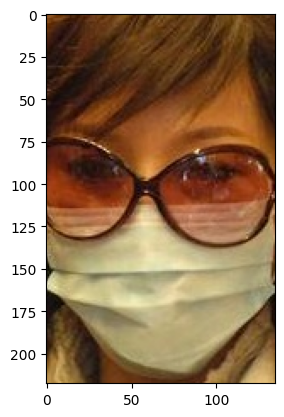

In [ ]:
#displaying with_mask image
img=mpimg.imread('/content/data/with_mask/with_mask_10.jpg')
plt.imshow(img)

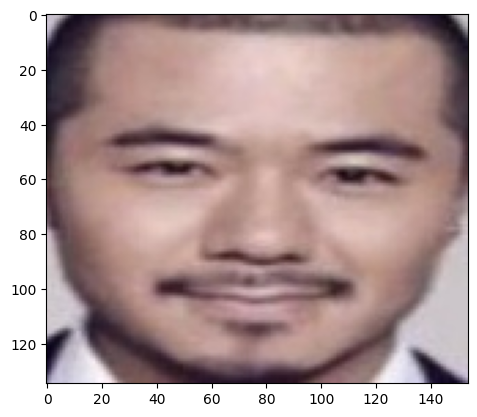

In [ ]:
img=mpimg.imread('/content/data/without_mask/without_mask_10.jpg')
plt.imshow(img)

In [ ]:
#Resizing All images and saving image in different folders
#creating directory for resized image
os.mkdir('with_mask_resized')
os.mkdir('without_mask_resized')

In [ ]:
#resize with mask image
with_mask_folder='/content/data/with_mask/'
with_mask_resized_folder='/content/with_mask_resized/'

for filename in os.listdir(with_mask_folder):
  img_path=with_mask_folder+filename
  img = Image.open(img_path)
  img = img.resize((128,128))
  img = img.convert('RGB')
  img.save(with_mask_resized_folder+filename)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
#resize with mask image
without_mask_folder='/content/data/without_mask/'
without_mask_resized_folder='/content/without_mask_resized/'

for filename in os.listdir(without_mask_folder):
  img_path=without_mask_folder+filename
  img = Image.open(img_path)
  img = img.resize((128,128))
  img = img.convert('RGB')
  img.save(without_mask_resized_folder+filename)

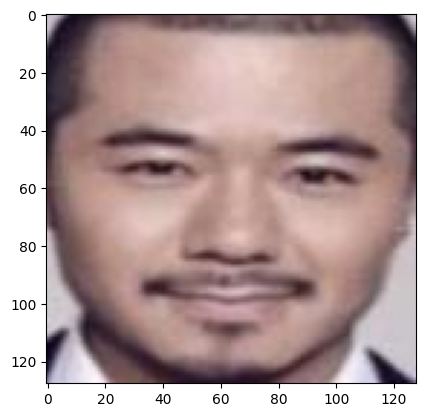

In [ ]:
img=mpimg.imread('/content/without_mask_resized/without_mask_10.jpg')
plt.imshow(img)

In [ ]:
#converting image to numpy array
import cv2
import glob

In [ ]:
imdir = '/content/with_mask_resized/'
ext = ['png','jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

with_mask_images = np.asarray([cv2.imread(file) for file in files])


In [ ]:
imdir = '/content/without_mask_resized/'
ext = ['png','jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

without_mask_images = np.asarray([cv2.imread(file) for file in files])


In [ ]:
print(with_mask_images[0])
print(without_mask_images[0])

[[[ 25  38  52]
  [ 22  35  49]
  [ 19  32  46]
  ...
  [ 31  37  50]
  [ 30  36  49]
  [ 29  35  48]]

 [[ 23  36  50]
  [ 21  34  48]
  [ 20  33  47]
  ...
  [ 29  35  48]
  [ 29  35  48]
  [ 28  34  47]]

 [[ 20  33  47]
  [ 20  33  47]
  [ 22  35  49]
  ...
  [ 26  32  45]
  [ 28  34  47]
  [ 28  34  47]]

 ...

 [[ 57  74 101]
  [ 69  86 113]
  [ 80  97 123]
  ...
  [ 61 106 163]
  [ 63 108 165]
  [ 65 110 167]]

 [[ 49  68  95]
  [ 59  78 105]
  [ 70  87 114]
  ...
  [ 63 108 165]
  [ 65 109 163]
  [ 64 108 162]]

 [[ 44  63  90]
  [ 49  68  95]
  [ 54  71  98]
  ...
  [ 65 110 167]
  [ 66 107 162]
  [ 64 105 160]]]
[[[117 122 131]
  [117 122 131]
  [117 122 131]
  ...
  [103 106 120]
  [103 106 120]
  [103 106 120]]

 [[117 122 131]
  [117 122 131]
  [117 122 131]
  ...
  [104 107 121]
  [103 106 120]
  [103 106 120]]

 [[117 122 131]
  [117 122 131]
  [117 122 131]
  ...
  [104 107 121]
  [104 107 121]
  [103 106 120]]

 ...

 [[116 121 130]
  [116 121 130]
  [116 121 130]
  ..

In [ ]:
print(with_mask_images.shape)
print(without_mask_images.shape)

(3725, 128, 128, 3)
(3828, 128, 128, 3)


In [ ]:
combined_images=np.concatenate((with_mask_images,without_mask_images))

In [ ]:
print(combined_images.shape)

(7553, 128, 128, 3)


In [ ]:
X=combined_images
Y=np.asarray(labels)

In [ ]:
#Train & Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (6042,) (1511, 128, 128, 3) (1511,)


In [ ]:
#standardinzing the data
X_train_std=X_train/255
X_test_std=X_test/255

In [ ]:
print(X_train_std[0])

[[[0.95294118 0.70980392 0.28627451]
  [0.88627451 0.65098039 0.23529412]
  [0.85490196 0.63529412 0.23921569]
  ...
  [0.69019608 0.77254902 0.80392157]
  [0.76862745 0.83137255 0.85882353]
  [0.77254902 0.82745098 0.85098039]]

 [[0.89803922 0.6627451  0.24705882]
  [0.90196078 0.67058824 0.26666667]
  [0.87058824 0.65490196 0.26666667]
  ...
  [0.63529412 0.71764706 0.74901961]
  [0.7372549  0.8        0.82745098]
  [0.81568627 0.87058824 0.89411765]]

 [[0.88235294 0.65098039 0.25882353]
  [0.9254902  0.70196078 0.31372549]
  [0.88627451 0.67843137 0.32156863]
  ...
  [0.62352941 0.69803922 0.72941176]
  [0.71372549 0.76470588 0.79607843]
  [0.81176471 0.85490196 0.88627451]]

 ...

 [[0.94117647 0.90980392 0.75294118]
  [0.90196078 0.86666667 0.69411765]
  [0.89019608 0.83137255 0.63921569]
  ...
  [0.22352941 0.34901961 0.43921569]
  [0.2        0.32156863 0.41960784]
  [0.19607843 0.31764706 0.41568627]]

 [[0.95294118 0.92941176 0.76078431]
  [0.93333333 0.90196078 0.71764706]


Building The Neural Network

In [ ]:
import tensorflow as tf
import keras

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Load a pretrained MobileNetV2 model
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model layers

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Reduce feature maps to a single vector
    layers.Dense(128, activation='relu'),  # Dense layer for classification
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(2, activation='softmax')  # Two output classes (mask, no mask)
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train_std,Y_train,epochs=10)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 96s 457ms/step - accuracy: 0.9143 - loss: 0.2137
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 141s 454ms/step - accuracy: 0.9757 - loss: 0.0646
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 81s 428ms/step - accuracy: 0.9824 - loss: 0.0541
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 86s 450ms/step - accuracy: 0.9889 - loss: 0.0310
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 141s 447ms/step - accuracy: 0.9894 - loss: 0.0316
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 85s 451ms/step - accuracy: 0.9902 - loss: 0.0267
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 145s 465ms/step - accuracy: 0.9934 - loss: 0.0177
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 137s 438ms/step - accuracy: 0.9903 - loss: 0.0230
Epoch 9/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 141s 434ms/step - accuracy: 0.9954 - loss: 0.0111
Epoch 10/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 146s 455ms/step - accuracy: 0.9916 - loss: 0.0182


In [ ]:
score,acc=model.evaluate(X_test_std,Y_test)
print('Test data loss:',score)
print('Test data accuracy:',acc)

48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 454ms/step - accuracy: 0.9795 - loss: 0.0740
Test data loss: 0.06760553270578384
Test data accuracy: 0.982792854309082


**BUILDING A PREDICTIVE SYSTEM**

In [ ]:
from google.colab.patches import cv2_imshow


path of image to be predicted: /content/image12.jpeg


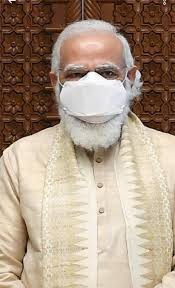

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
The person is wearing mask


In [ ]:
input_image_path=input('path of image to be predicted: ')
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image=cv2.resize(input_image,(128,128))
input_image=input_image/255
input_image=np.reshape(input_image,[1,128,128,3])
prediction=model.predict(input_image)
input_pred_label=np.argmax(prediction)
if input_pred_label==1:
  print('The person is wearing mask')
else:
  print('The person is not wearing mask')